In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
from imblearn.over_sampling import RandomOverSampler
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
data = pd.read_csv('StressLevelDataset.csv')
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [3]:
data.shape

(1100, 21)

In [4]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


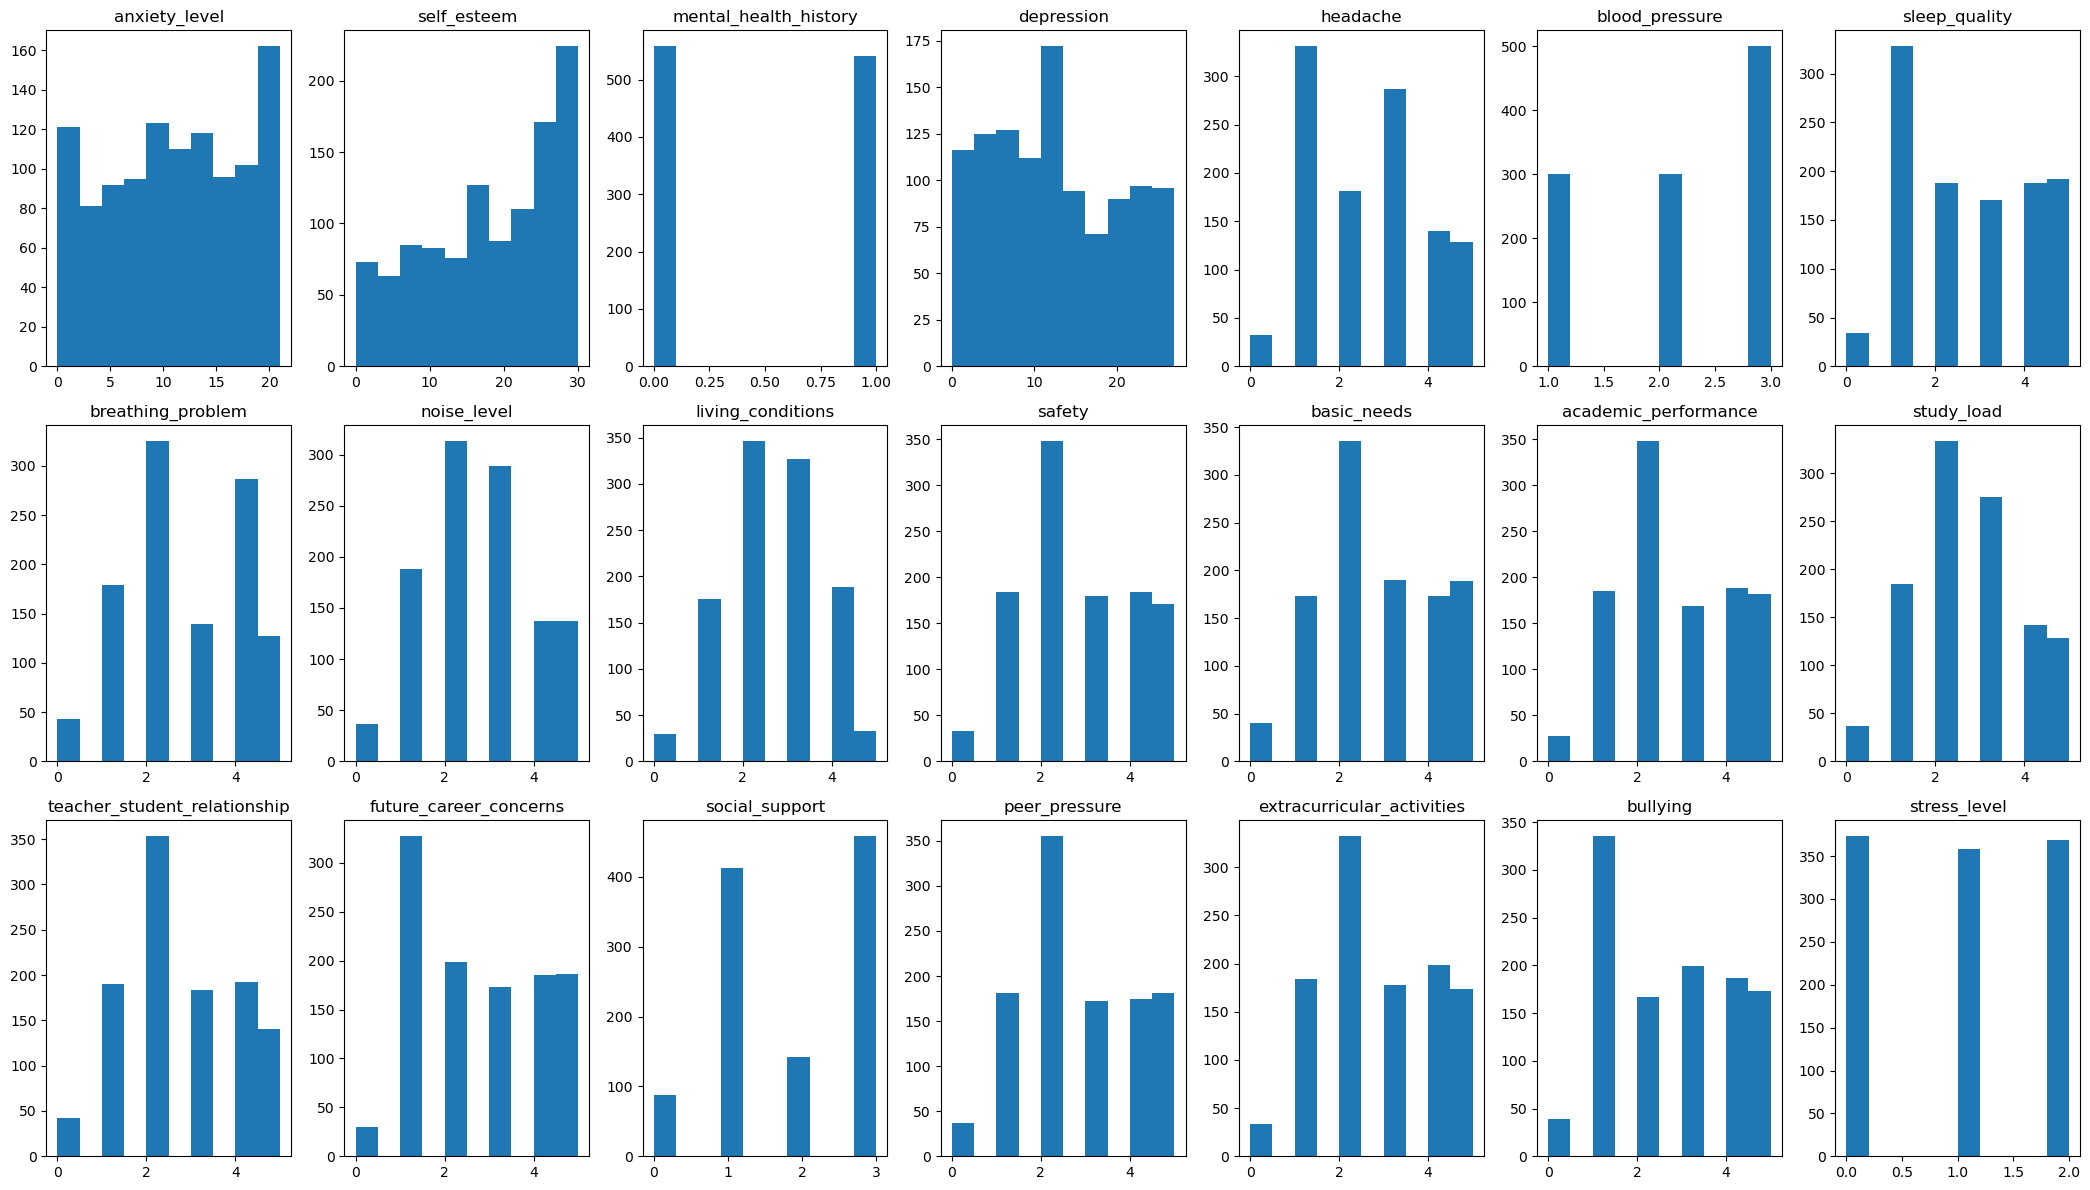

In [5]:
column_names = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache',
                'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level',
                'living_conditions', 'safety', 'basic_needs', 'academic_performance',
                'study_load', 'teacher_student_relationship', 'future_career_concerns',
                'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying',
                'stress_level']

fig, axs = plt.subplots(3, 7, figsize=(21, 12))

for i, ax in enumerate(axs.flatten()):
    if i < len(column_names):
        ax.hist(data[column_names[i]])
        ax.set_title(column_names[i])

plt.tight_layout()
plt.show()

These histograms illustrates the frequency distribution of values within each individual column of a dataset.

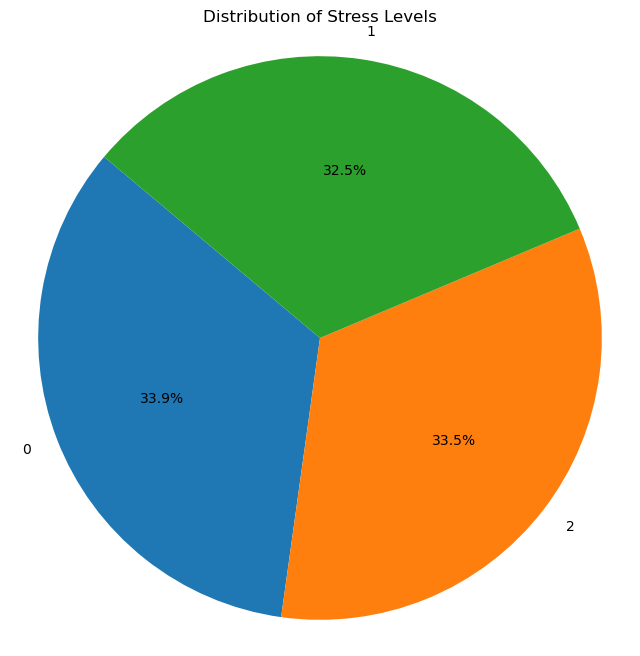

In [7]:
stress_level_counts = data['stress_level'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(stress_level_counts, labels=stress_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Stress Levels')
plt.axis('equal')
plt.show()

The pie chart illustrates the distribution of stress levels across the dataset, showcasing three distinct categories. Each segment represents a stress level category, with the size of each segment indicating the proportion of individuals falling into that category. This visualization provides a clear overview of the relative prevalence of different stress levels within the dataset

In [13]:
print(data.isnull().sum())

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [14]:
X = data.drop('stress_level', axis=1)
y = data['stress_level']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Fit and transform the data
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Create a new balanced dataset
balanced_data = pd.concat([X_oversampled, y_oversampled], axis=1)

# Print the value counts of the target variable before and after oversampling
print("Before Oversampling:")
print(y.value_counts())
print("After Oversampling:")
print(y_oversampled.value_counts())

Before Oversampling:
stress_level
0    373
2    369
1    358
Name: count, dtype: int64
After Oversampling:
stress_level
1    373
2    373
0    373
Name: count, dtype: int64


In [15]:
#Checking for features correlation with output variable
correlation_matrix = data.corr()
stress_correlation = correlation_matrix['stress_level'].sort_values(ascending=False)
stress_correlation

stress_level                    1.000000
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64

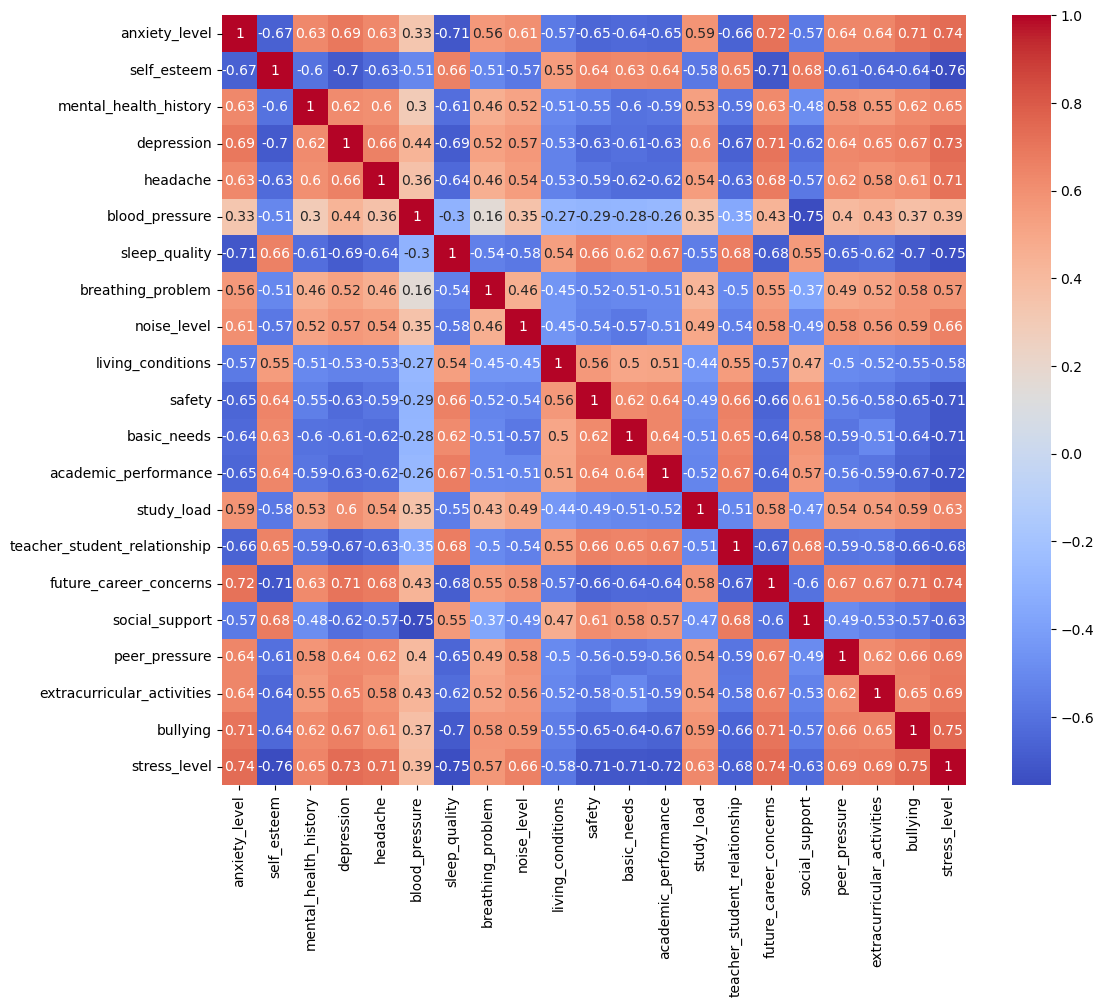

In [16]:
#Correlation Heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [25]:
#Selecting Important Features out of total 21 features
extratrees = ek.ExtraTreesClassifier().fit(X_oversampled, y_oversampled)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X_oversampled)
nbfeatures = X_new.shape[1]
nbfeatures

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


8

In [26]:
# Getting the selected feature names
selected_feature_names = X_oversampled.columns[model.get_support()]

# Printing the selected feature names
print(selected_feature_names)

Index(['anxiety_level', 'blood_pressure', 'sleep_quality', 'basic_needs',
       'teacher_student_relationship', 'future_career_concerns',
       'social_support', 'bullying'],
      dtype='object')


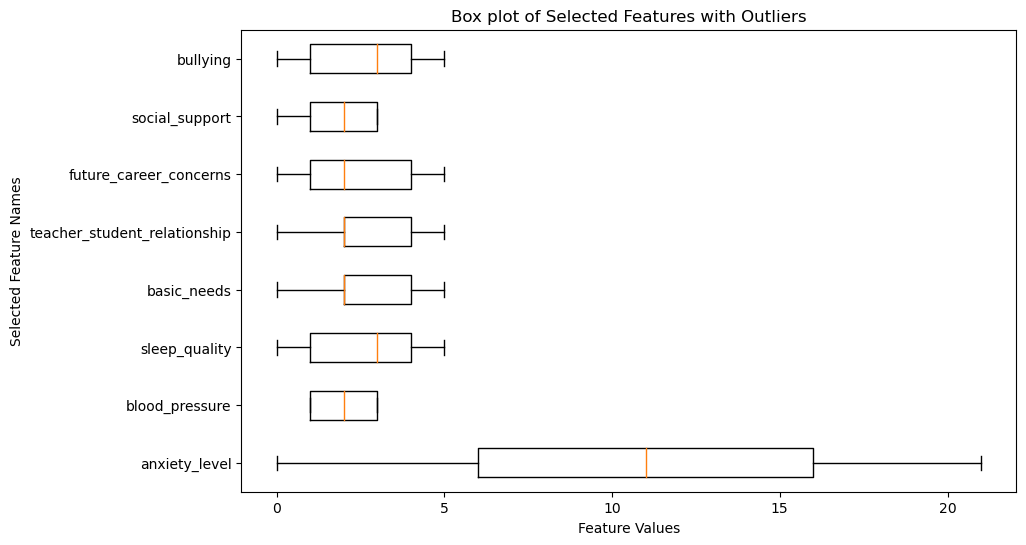

In [27]:
# Create a box plot for the selected features
plt.figure(figsize=(10, 6))
plt.boxplot(X_new, vert=False, labels=selected_feature_names, showfliers=True)
plt.title('Box plot of Selected Features with Outliers')
plt.xlabel('Feature Values')
plt.ylabel('Selected Feature Names')
plt.show()

These Box Plots shows the absence of outliers in the selected features affirming the robustness and consistency of the dataset across various variables.

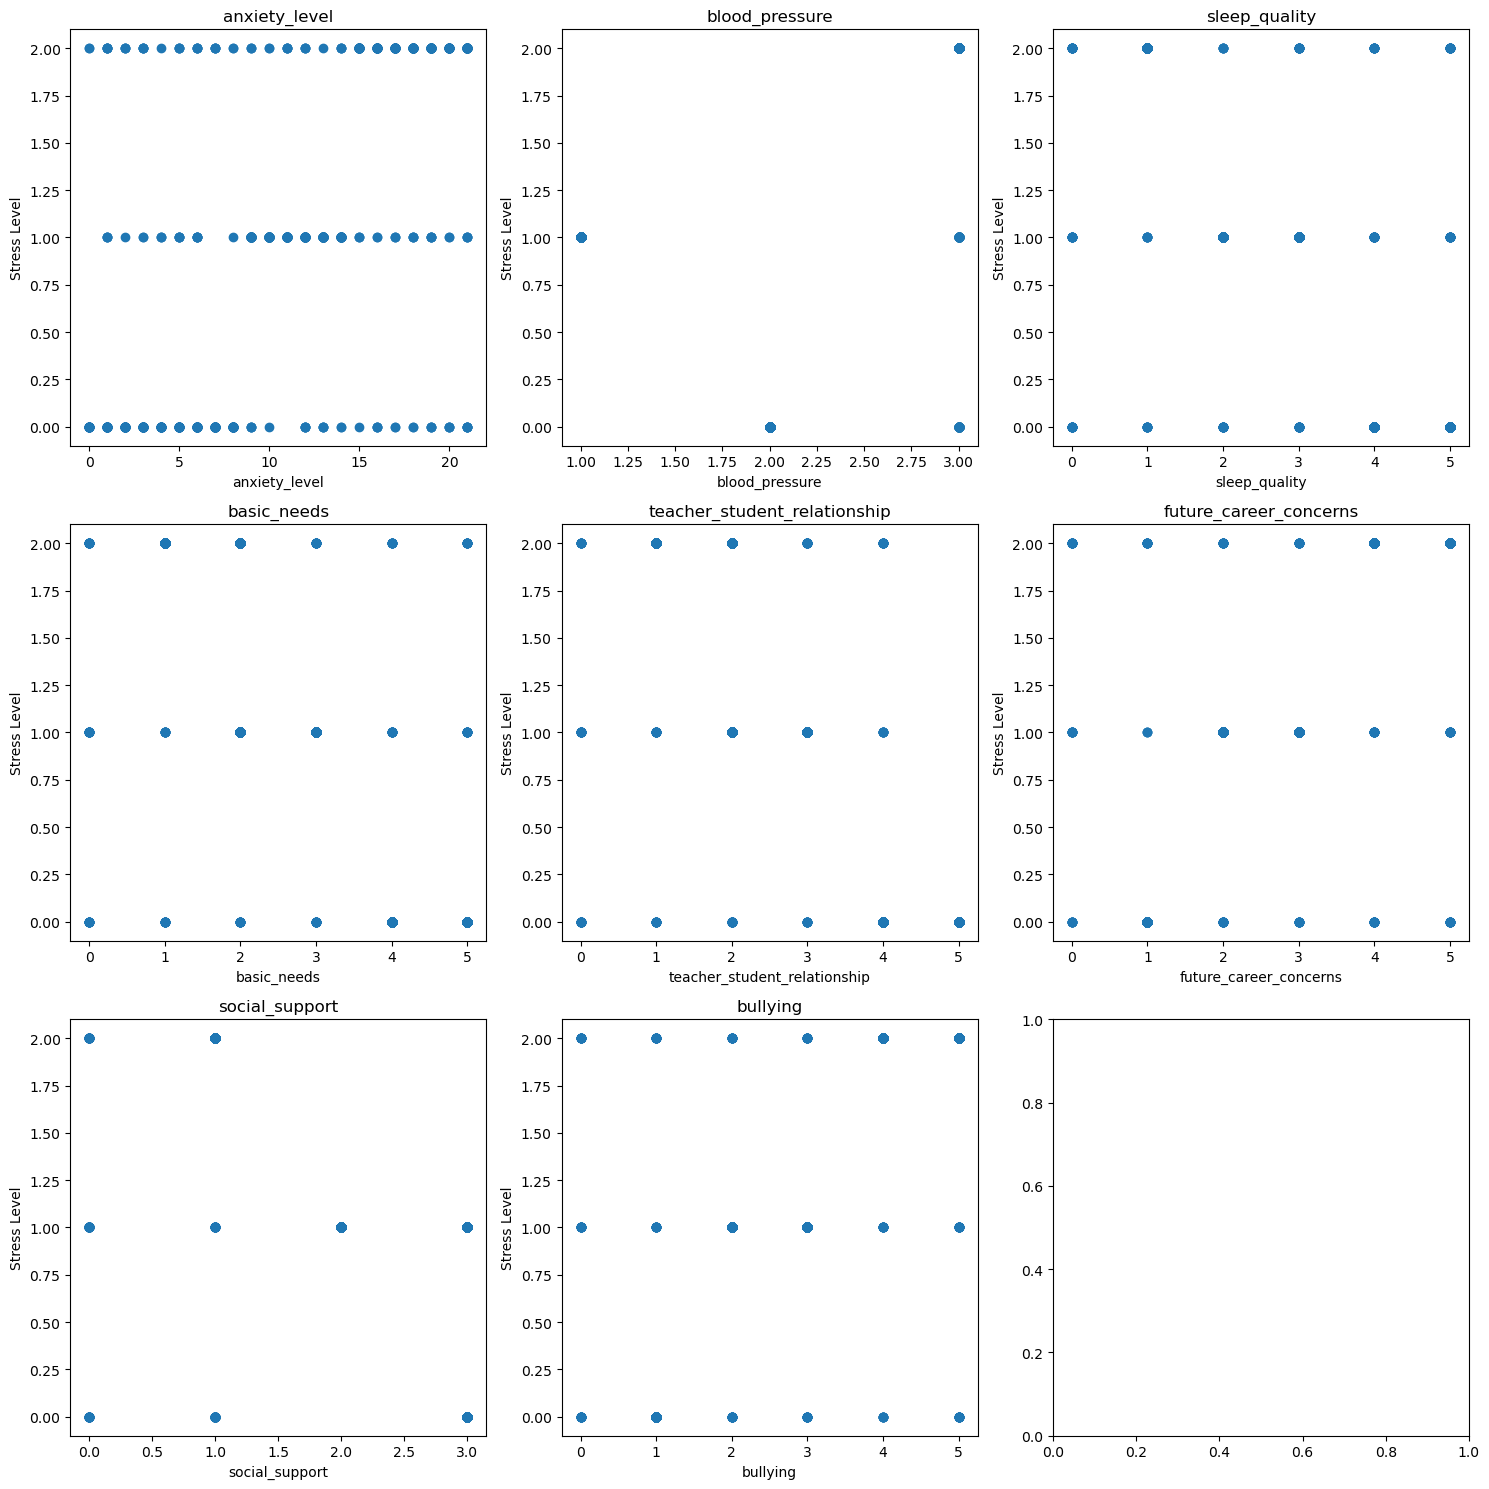

In [28]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Assuming you want a 3x3 grid for the plots

for i, ax in enumerate(axs.flatten()):
    if i < len(selected_feature_names):
        ax.scatter(balanced_data[selected_feature_names[i]], balanced_data['stress_level'])
        ax.set_title(selected_feature_names[i])
        ax.set_xlabel(selected_feature_names[i])
        ax.set_ylabel('Stress Level')

plt.tight_layout()
plt.show()

The above mentioned scatter plots shows the relationship between selected features and output feature.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_oversampled, test_size=0.25, random_state=42)

In [19]:
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        98
           1       0.90      0.90      0.90        91
           2       0.87      0.89      0.88        91

    accuracy                           0.90       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.90      0.90      0.90       280



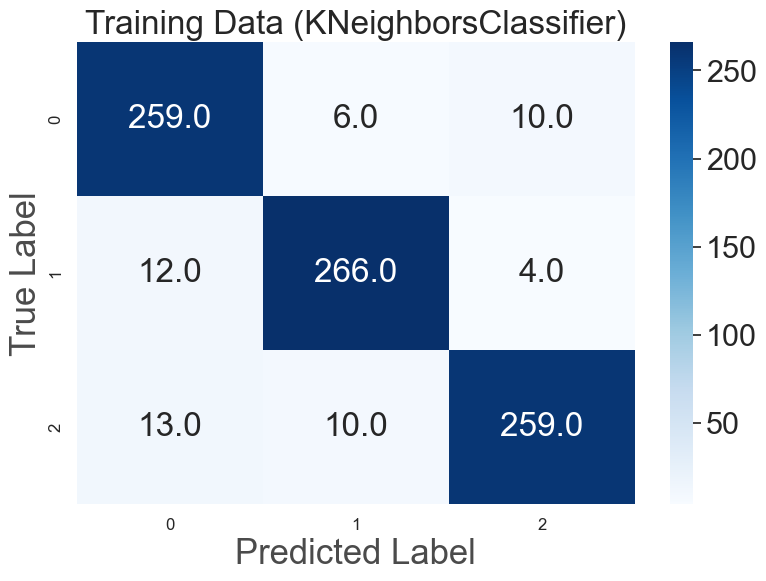

In [41]:
#Confusion Matrix of training data
y_pred_train=knn_classifier.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)

sns.set_style("darkgrid")
sns.set(font_scale=2)

f,ax = plt.subplots(figsize=(9,6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues' ,ax=ax)

plt.title("Training Data (KNeighborsClassifier)")
plt.ylabel('True Label',fontsize=25, color="#4b4b4b")
plt.xlabel('Predicted Label', fontsize=25, color="#4b4b4b")
plt.show()

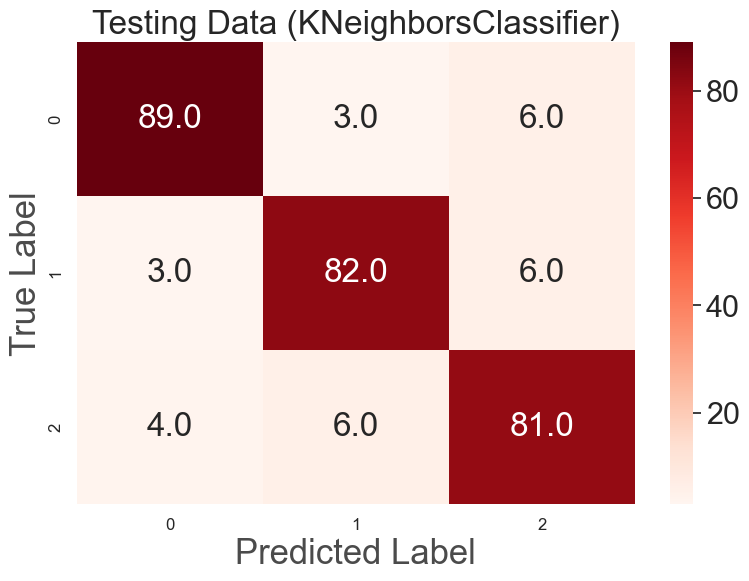

In [42]:
#Confusion Matrix of testing data
y_pred_test=knn_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)

sns.set_style("darkgrid")
sns.set(font_scale=2)

f,ax = plt.subplots(figsize=(9,6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Reds' ,ax=ax)

plt.title("Testing Data (KNeighborsClassifier)")
plt.ylabel('True Label',fontsize=25, color="#4b4b4b")
plt.xlabel('Predicted Label', fontsize=25, color="#4b4b4b")
plt.show()

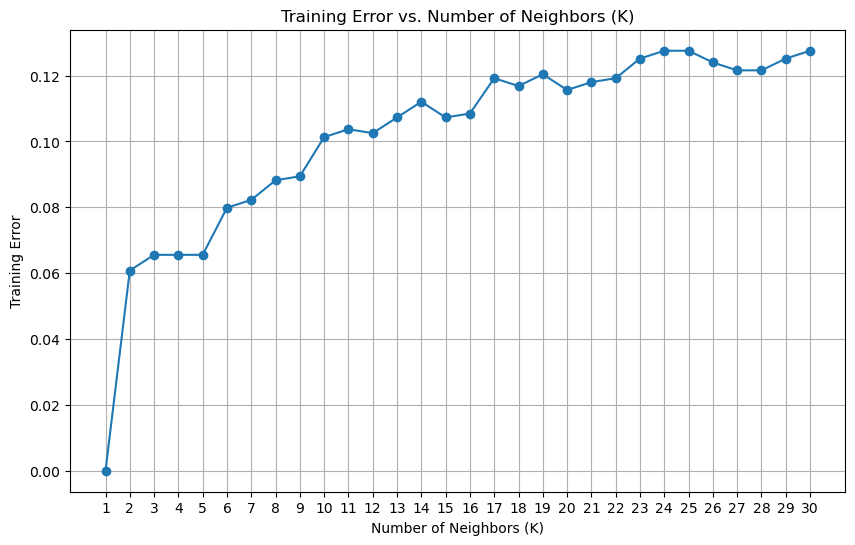

In [21]:
k_values = list(range(1, 31))


training_errors = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_errors.append(1 - knn.score(X_train, y_train))

plt.figure(figsize=(10, 6))
plt.plot(k_values, training_errors, marker='o', linestyle='-')
plt.title('Training Error vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Training Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [34]:
model = KNeighborsClassifier()

k = 5
scores = cross_val_score(model, X_new, y_oversampled, cv=k)

print("Cross-validation scores:", scores)

mean_score = scores.mean()
std_dev = scores.std()
print("Mean score:", mean_score)
print("Standard deviation of scores:", std_dev)

Cross-validation scores: [0.89732143 0.88392857 0.87946429 0.89285714 0.89686099]
Mean score: 0.8900864830237027
Standard deviation of scores: 0.007164716908198935


In [17]:
model.fit(X_train, y_train)

random_values = np.random.randint(low=0, high=10, size=(1, len(selected_feature_names)))

random_data = pd.DataFrame(random_values, columns=selected_feature_names)

print("Random Data for Selected Features:")
print(random_data)

predicted_stress_level_random = model.predict(random_data)

print("Predicted Stress Level for Random Data:", predicted_stress_level_random[0])

Random Data for Selected Features:
   self_esteem  blood_pressure  sleep_quality  safety  social_support  \
0            3               4              1       7               2   

   peer_pressure  
0              2  
Predicted Stress Level for Random Data: 0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
